# Đồ Án Cuối Kỳ Môn Lập Trình Cho Khoa Học Dữ Liệu

## Chủ đề:

## Thông tin nhóm:
1. Nguyễn Tấn Thìn - 18120085
1. Phạm Nguyên Minh Thy - 18120090

## Nội dung file notebook:
1. Thu thập dữ liệu
2. Khám phá dữ liệu và tiền xử lý (nếu có)
3. Đưa ra câu hỏi
4. Tiền xử lý và trả lời câu hỏi
5. Nhìn lại quá trình làm đồ án

## 1. Thu thập dữ liệu

Trong đồ án này nhóm em sử dụng dữ liệu đã được thu thập sẵn `Levels_Fyi_Salary_Data.csv` chia sẻ trên Kaggle ([nguồn](https://www.kaggle.com/jackogozaly/data-science-and-stem-salaries)). Đây là tập dữ liệu chứa hơn 62000 hồ sơ lương từ các công ty công nghệ hàng đầu, chứa các thông tin như vị trí công việc, mức lương, tên công ty, năm kinh nghiệm,... Dữ liệu này được Jack Ogozaly (người đăng tập dữ liệu lên Kaggle) lấy từ trang [levels.fyi](https://www.levels.fyi/) và tiến hành làm sạch. Theo nhóm em tìm hiểu được thì tác giả dùng thư viện request của python để lấy dữ liệu từ trang levels.fyi về dưới dạng json. Sau đó thay thế các giá trị rỗng bằng NaN, chuyển các cột số dạng object về int hoặc float.

## 2. Khám phá dữ liệu và tiền xử lý (nếu có)

### Import các thư viện

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
pd.set_option('display.max_colwidth', 100)

### Đọc dữ liệu và đổi tên một số cột
Phần lớn tên các cột ở dạng viết thường và viết liền, vài cột cuối có dạng viết hoa chữ cái đầu từ và cách nhau bằng gạch dưới. Tiến hành đổi tên vài cột cuối cho đồng nhất.

In [3]:
salary_df = pd.read_csv('./Data/Levels_Fyi_Salary_Data.csv')
salary_df.rename(lambda col: str(col).lower().replace('_', ''), axis="columns", inplace=True)
salary_df

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,doctoratedegree,highschool,somecollege,raceasian,racewhite,racetwoormore,raceblack,racehispanic,race,education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62637,9/9/2018 11:52:32,Google,T4,Software Engineer,327000,"Seattle, WA",10.0,1.0,Distributed Systems (Back-End),155000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
62638,9/13/2018 8:23:32,Microsoft,62,Software Engineer,237000,"Redmond, WA",2.0,2.0,Full Stack,146900.0,...,0,0,0,0,0,0,0,0,NaN,NaN
62639,9/13/2018 14:35:59,MSFT,63,Software Engineer,220000,"Seattle, WA",14.0,12.0,Full Stack,157000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
62640,9/16/2018 16:10:35,Salesforce,Lead MTS,Software Engineer,280000,"San Francisco, CA",8.0,4.0,iOS,194688.0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [4]:
salary_df.columns

Index(['timestamp', 'company', 'level', 'title', 'totalyearlycompensation',
       'location', 'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary',
       'stockgrantvalue', 'bonus', 'gender', 'otherdetails', 'cityid', 'dmaid',
       'rownumber', 'mastersdegree', 'bachelorsdegree', 'doctoratedegree',
       'highschool', 'somecollege', 'raceasian', 'racewhite', 'racetwoormore',
       'raceblack', 'racehispanic', 'race', 'education'],
      dtype='object')

### Dữ liệu có bao nhiêu dòng và bao nhiêu cột?

In [4]:
num_rows, num_cols = salary_df.shape
num_rows, num_cols

(62642, 29)

### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?
Theo mô tả trên kaggle thì mỗi dòng là hồ sơ lương của một người tại một công ty. Các dòng đều mang ý nghĩa giống nhau

### Dữ liệu có các dòng bị lặp không?

In [39]:
has_duplicate = salary_df.duplicated().sum() > 0
has_duplicate

False

### Mỗi cột có ý nghĩa gì

Dữ liệu này chứa rất nhiều cột. Ý nghĩa một số cột trong file `Levels_Fyi_Salary_Data.csv` được giải thích trong bảng sau:

|Cột|Ý nghĩa|
|---|---|
|**timestamp**|Ngày giờ (%m/%d/%Y %H:%M) ghi nhận thông tin| 
|**company**|Tên công ty làm việc|
|**level**|Trình độ của công việc|
|**title**|Chức vụ hay vị trí công việc|
|**totalyyearlycompensation**|Tổng thu nhập hằng năm có thể bao gồm lương, tiền hỗ trợ, thưởng, bảo hiểm, du lịch ...|
|**location**|Địa điểm làm việc|
|**yearofexperience**|Số năm kinh nghiệm|
|**yearsatcompany**|Số năm làm việc ở công ty|
|**tag**|Phân loại công việc|
|**basesalary**|Lương cơ bản|
|**stockgrantvalue**|Giá trị thưởng bằng cổ phiếu|
|**bonus**|Tiền thưởng|
|**gender**|Giới tính|
|**otherdetails**|Mô tả thêm về vị trí công việc|
|**cityid**|Mã thành phố|
|**dmaid**| Mã DMA (Designated Market Area) là vùng mà dân cư trong vùng đó nhận cùng chương trình truyền hình hoặc phát thanh|
|**mastersdegree**|Có bằng thạc sĩ hay không|
|**doctoratedegree**|Có bằng tiến sĩ hay không|
|**highschool**|Có học trung học hay không|
|**somecollege**|Có học ở trường cao đẳng hay không|
|**race**|Dân tộc, chủng tộc|
|**education**|Trình độ văn hoá|

### Có cột nào dư thừa hay không cần thiết không?

Tiến hành loại bỏ các cột `cityid, dmaid, rownumber, raceasian, racewhite, racetwoormore, raceblack, racehispanic, level`.
- Cột `cityid`, `dmaid` là các mã địa điểm, không mang lại nhiều ý nghĩa
- Cột `rownumber` đếm thứ tự dòng, không mang lại nhiều ý nghĩa
- Nhận thấy rằng các cột `raceasian, racewhite, racetwoormore, raceblack, racehispanic` là không cần thiết vì đã có cột `race` thống kê lại các giá trị cho race rồi.
- Cột `level` cũng có khá nhiều giá trị khác nhau do mỗi công ty sẽ có kí hiệu riêng cho các level. Để đánh giá chung cho các công ty thì có thể dùng cột `title`.

In [40]:
drop_cols = ["cityid", "dmaid", 'rownumber', "raceasian", "racewhite", "racetwoormore", "raceblack", "racehispanic", "level"]
salary_df.drop(drop_cols, axis=1, inplace=True)
salary_df

,timestamp,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,mastersdegree,bachelorsdegree,doctoratedegree,highschool,somecollege,race,education
0,6/7/2017 11:33:27,Oracle,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,20000.0,10000.0,NaN,NaN,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,0.0,0.0,NaN,NaN,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,0.0,0.0,NaN,NaN,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,180000.0,35000.0,NaN,NaN,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,0.0,0.0,NaN,NaN,0,0,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62637,9/9/2018 11:52:32,Google,Software Engineer,327000,"Seattle, WA",10.0,1.0,Distributed Systems (Back-End),155000.0,150000.0,22000.0,NaN,NaN,0,0,0,0,0,NaN,NaN
62638,9/13/2018 8:23:32,Microsoft,Software Engineer,237000,"Redmond, WA",2.0,2.0,Full Stack,146900.0,73200.0,16000.0,NaN,NaN,0,0,0,0,0,NaN,NaN
62639,9/13/2018 14:35:59,MSFT,Software Engineer,220000,"Seattle, WA",14.0,12.0,Full Stack,157000.0,25000.0,20000.0,NaN,NaN,0,0,0,0,0,NaN,NaN
62640,9/16/2018 16:10:35,Salesforce,Software Engineer,280000,"San Francisco, CA",8.0,4.0,iOS,194688.0,57000.0,29000.0,NaN,NaN,0,0,0,0,0,NaN,NaN


### Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

In [41]:
salary_df.dtypes

timestamp                   object
company                     object
title                       object
totalyearlycompensation      int64
location                    object
yearsofexperience          float64
yearsatcompany             float64
tag                         object
basesalary                 float64
stockgrantvalue            float64
bonus                      float64
gender                      object
otherdetails                object
mastersdegree                int64
bachelorsdegree              int64
doctoratedegree              int64
highschool                   int64
somecollege                  int64
race                        object
education                   object
dtype: object

**Nhận xét:** Ở đây, phần lớn các cột đều ở đúng định dạng, cả chỉ có cột "timestamp" cần chuyển từ object về "datetime" để tiện cho khám phá sau này

### Tiền xử lý 
Chuyển cột "timestamp" sang kiểu dữ liệu datetime

In [42]:
# salary_df['timestamp'] 
salary_df['timestamp'] = pd.to_datetime(salary_df['timestamp'], format='%m/%d/%Y %H:%M:%S')
salary_df.dtypes

timestamp                  datetime64[ns]
company                            object
title                              object
totalyearlycompensation             int64
location                           object
yearsofexperience                 float64
yearsatcompany                    float64
tag                                object
basesalary                        float64
stockgrantvalue                   float64
bonus                             float64
gender                             object
otherdetails                       object
mastersdegree                       int64
bachelorsdegree                     int64
doctoratedegree                     int64
highschool                          int64
somecollege                         int64
race                               object
education                          object
dtype: object

### Với mỗi cột có kiểu dữ liệu dạng số (numerical), các giá trị được phân bố như thế nào?

Các cột có kiểu dữ liệu dạng số gồm: "timestamp", "totalyearlycompensation", "yearsofexperience", "yearsatcompany", "basesalary", "stockgrantvalue", "bonus".

In [43]:
def missing_ratio(s):
    return s.isna().mean() * 100

def lower_quantile(s):
    return s.quantile(0.25)

def upper_quantile(s):
    return s.quantile(0.75)

def percentile_5(s):
    return s.quantile(0.05)

def percentile_95(s):
    return s.quantile(0.95)

numeric_cols = ["timestamp", "totalyearlycompensation", "yearsofexperience", "yearsatcompany", "basesalary", "stockgrantvalue", "bonus"]
nume_col_profiles_df = salary_df[numeric_cols]\
    .agg([missing_ratio, pd.Series.mean, pd.Series.std, pd.Series.min, percentile_5, lower_quantile, pd.Series.median, upper_quantile, percentile_95, pd.Series.max])
nume_col_profiles_df.T

,missing_ratio,mean,std,min,percentile_5,lower_quantile,median,upper_quantile,percentile_95,max
timestamp,0.0,2020-07-17 03:30:08.313814784,307 days 01:41:17.797452992,2017-06-07 11:33:27,2018-11-02 17:20:13.900000,2020-01-11 23:12:55.500000,2020-09-21 16:31:21,2021-03-26 15:19:06.500000,2021-07-23 01:08:23.349999872,2021-08-17 08:28:57
totalyearlycompensation,0.0,216300.373647,138033.746377,10000.0,65000.0,135000.0,188000.0,264000.0,457950.0,4980000.0
yearsofexperience,0.0,7.204135,5.840375,0.0,0.0,3.0,6.0,10.0,20.0,69.0
yearsatcompany,0.0,2.702093,3.263656,0.0,0.0,0.0,2.0,4.0,9.0,69.0
basesalary,0.0,136687.281297,61369.278057,0.0,23000.0,108000.0,140000.0,170000.0,222950.0,1659870.0
stockgrantvalue,0.0,51486.080733,81874.569391,0.0,0.0,0.0,25000.0,65000.0,200000.0,2800000.0
bonus,0.0,19334.746588,26781.29204,0.0,0.0,1000.0,14000.0,26000.0,60000.0,1000000.0


### Với mỗi cột có kiểu dữ liệu dạng phân loại (categorical), các giá trị được phân bố như thế nào?

Các cột có kiểu dữ liệu dạng phân loại gồm: "company", "level", "title", "location", "tag", "gender", "otherdetails", "cityid", "dmaid", "rownumber", "mastersdegree", "bachelorsdegree", "doctoratedegree", "highschool", "somecollege", "raceasian", "racewhite", "racetwoormore", "raceblack", "racehispanic", "race", "education"

In [44]:
def num_diff_vals(s):
    return s.nunique()

def diff_vals(s):
    return s.dropna().unique()

def diff_vals_count(s):
    return s.value_counts().to_dict()

# cate_cols = ["company", "level", "title", "location", "tag", "gender", "otherdetails", "cityid", 
#              "dmaid", "rownumber", "mastersdegree", "bachelorsdegree", "doctoratedegree", "highschool",
#              "somecollege", "raceasian", "racewhite", "racetwoormore", "raceblack", "racehispanic", "race", "education"]
cate_cols = ["company", "title", "location", "tag", "gender", "otherdetails",
             "mastersdegree", "bachelorsdegree", "doctoratedegree", "highschool", "somecollege", "race", "education"]
cate_col_profiles_df = salary_df[cate_cols].agg([missing_ratio, num_diff_vals, diff_vals, diff_vals_count])
cate_col_profiles_df.T

,missing_ratio,num_diff_vals,diff_vals,diff_vals_count
company,0.007982,1631,"[Oracle, eBay, Amazon, Apple, Microsoft, Salesforce, Facebook, Uber, Oath, Google, Netflix, Pint...","{'Amazon': 8126, 'Microsoft': 5216, 'Google': 4330, 'Facebook': 2990, 'Apple': 2028, 'Oracle': 1..."
title,0.0,15,"[Product Manager, Software Engineer, Software Engineering Manager, Data Scientist, Solution Arch...","{'Software Engineer': 41231, 'Product Manager': 4673, 'Software Engineering Manager': 3569, 'Dat..."
location,0.0,1050,"[Redwood City, CA, San Francisco, CA, Seattle, WA, Sunnyvale, CA, Mountain View, CA, Redmond, WA...","{'Seattle, WA': 8701, 'San Francisco, CA': 6797, 'New York, NY': 4562, 'Redmond, WA': 2649, 'Mou..."
tag,1.363303,3058,"[Full Stack, Distributed Systems (Back-End), Embedded Systems, API Development (Back-End), DevOp...","{'Full Stack': 11382, 'Distributed Systems (Back-End)': 10838, 'API Development (Back-End)': 627..."
gender,31.193129,4,"[Male, Female, Other, Title: Senior Software Engineer]","{'Male': 35702, 'Female': 6999, 'Other': 400, 'Title: Senior Software Engineer': 1}"
otherdetails,35.926375,12841,"[Tons of overtime, PhD, How do I access results?, Year 2 bonus, 24k, 401k match 50%, vested imme...","{'Masters': 3983, 'Title: Software Engineer': 1453, 'Race: Asian, Academic Level: Master’s degre..."
mastersdegree,0.0,2,"[0, 1]","{0: 47251, 1: 15391}"
bachelorsdegree,0.0,2,"[0, 1]","{0: 50037, 1: 12605}"
doctoratedegree,0.0,2,"[0, 1]","{0: 60839, 1: 1803}"
highschool,0.0,2,"[0, 1]","{0: 62322, 1: 320}"


### Có dòng nào mang giá trị bất thường không

Cột gender: có 1 dòng mang giá trị kì lạ 'Title: Senior Software Engineer' 

In [46]:
salary_df[salary_df.gender=='Title: Senior Software Engineer'][['timestamp', 'company', 'title', 'gender', 'totalyearlycompensation', 'yearsofexperience', 'yearsatcompany']]

,timestamp,company,title,gender,totalyearlycompensation,yearsofexperience,yearsatcompany
11010,2019-09-17 06:23:02,GitHub,Software Engineer,Title: Senior Software Engineer,205000,15.0,4.0


Xoá dòng này ra khỏi dataframe

In [47]:
salary_df = salary_df[salary_df.gender!='Title: Senior Software Engineer']

##  3. Đưa ra câu hỏi

Nháp, khám phá

Một số ý tưởng:
- Top 10 công ty trả lương cao nhất, thấp nhất và số lương là bao nhiêu (vẽ biểu đồ cột)?
- Thời gian gắn bó với công ty như thế nào?
- Yếu tố nào giúp 1 người có tổng lương cao: lương cơ bản, lương thưởng thêm, số năm kinh nghiệm, bằng cấp, số năm làm việc lâu?
- Bằng PhD có giúp mang lại nhiều thu nhập hơn không? Có phải vị trí nào cũng cần có bằng PhD mới có lương cao? (So sánh lương tổng tb, lương cơ bản tb của người có bằng PhD, master và ko có)
- So sánh lương giữa các năm
- Biểu đồ lương trung bình của từng title theo năm (xu hướng ngành nghề mỗi năm)

### Top 10 công ty trả lương cao nhất, thấp nhất và số lương là bao nhiêu (vẽ biểu đồ cột) (mở rộng xét thêm title)

Phân phối của lương

Text(0.5, 1.0, 'Phân phối lương')

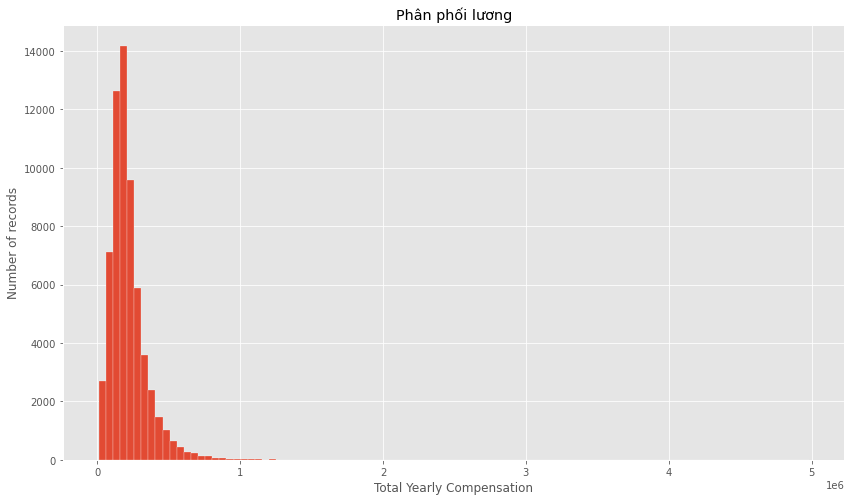

In [72]:
# plt.figure(figsize=(14, 8))
salary_df.totalyearlycompensation.hist(bins=100, figsize=(14, 8), edgecolor='white', linewidth=0.25)
plt.xlabel('Total Yearly Compensation')
plt.ylabel('Number of records')
plt.title('Phân phối lương')

Top 10 công ty trả lương cao nhất cùng mức lương (mỗi công ty chỉ lấy mức lương cao nhất làm đại diện chứ không lấy trung bình)

In [102]:
df = salary_df.groupby('company')[['totalyearlycompensation']].max()
# df = salary_df.groupby('company')['totalyearlycompensation'].agg(['max'])
df_max = df.sort_values('totalyearlycompensation', ascending=False).head(20)
df_max

,totalyearlycompensation
company,
Facebook,4980000
Microsoft,4950000
Google,4500000
Snap,2500000
SoFi,2000000
Uber,1900000
Amazon,1660000
Zapier,1605000
BCG,1600000


Text(0.5, 0, 'Total Yearly Compensation')

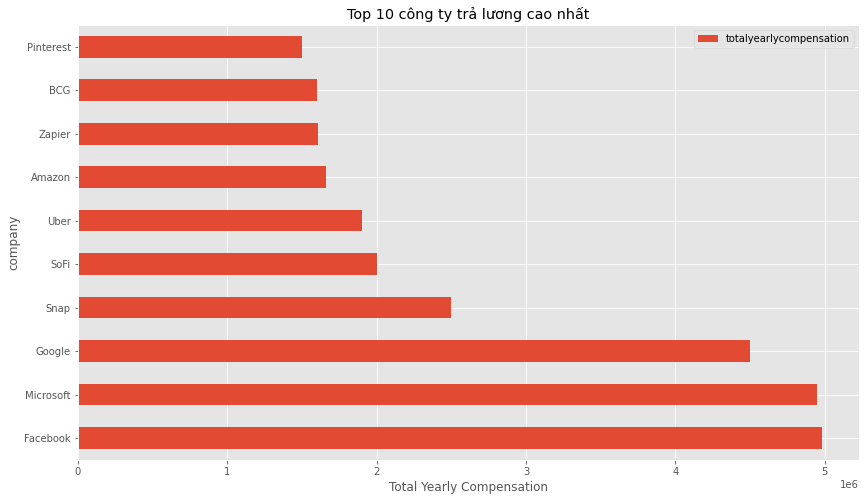

In [75]:
df_max.plot.barh(figsize=(14, 8))
plt.title('Top 10 công ty trả lương cao nhất')
plt.xlabel('Total Yearly Compensation')

Top 10 công ty trả lương thấp nhất cùng mức lương (mỗi công ty chỉ lấy mức lương cao nhất làm đại diện chứ không lấy trung bình)

In [76]:
df = salary_df.groupby('company')[['totalyearlycompensation']].max()
# df = salary_df.groupby('company')['totalyearlycompensation'].agg(['max'])
df_min = df.sort_values('totalyearlycompensation').head(10)
df_min

,totalyearlycompensation
company,
ZS associates,10000
TATA Consultancy Services,13000
verkada,15000
Nice,17000
Bukalapak,17000
siemens,18000
Browserstack,19000
AthenaHealth,23000
Zoho,24000


Text(0.5, 0, 'Total Yearly Compensation')

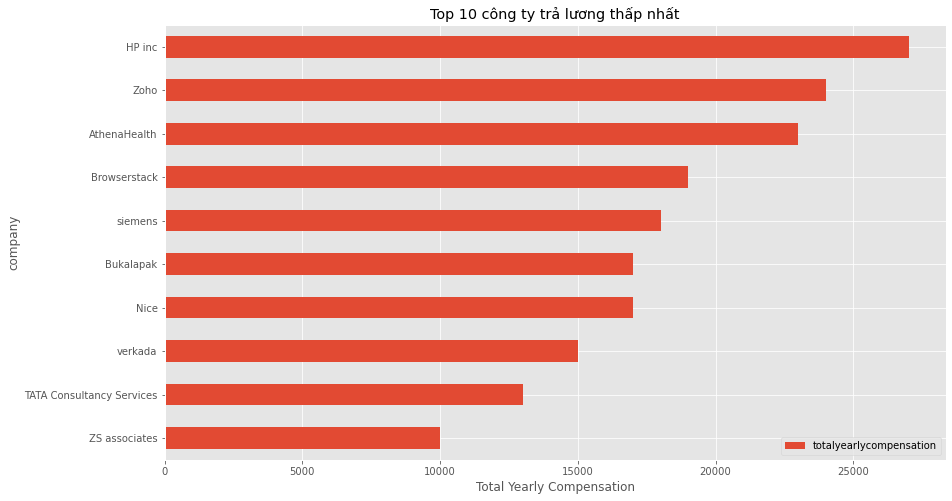

In [77]:
df_min.plot.barh(figsize=(14, 8))
plt.title('Top 10 công ty trả lương thấp nhất')
plt.xlabel('Total Yearly Compensation')

### Thời gian gắn bó với công ty như thế nào giữa các title (có thể liên hệ tới các công ty trả lương cao/thấp ở trên)

In [97]:
df = salary_df.groupby(['title'])[['yearsatcompany']].max()
# df.unstack()
df

,yearsatcompany
title,
Business Analyst,24.0
Data Scientist,20.0
Hardware Engineer,34.0
Human Resources,27.0
Management Consultant,20.0
Marketing,23.0
Mechanical Engineer,20.0
Product Designer,69.0
Product Manager,27.0


In [93]:
salary_df[salary_df.company=='Google']['title'].value_counts()

Software Engineer               3085
Product Manager                  292
Software Engineering Manager     170
Technical Program Manager        147
Product Designer                 139
Data Scientist                    89
Hardware Engineer                 80
Sales                             61
Business Analyst                  55
Solution Architect                50
Marketing                         49
Recruiter                         43
Human Resources                   29
Mechanical Engineer               28
Management Consultant             13
Name: title, dtype: int64

In [103]:
salary_df[salary_df.company=='Facebook']['totalyearlycompensation'].min()

60000

In [86]:
df.yearsatcompany.mean()

3.1091268753392347

<AxesSubplot:>

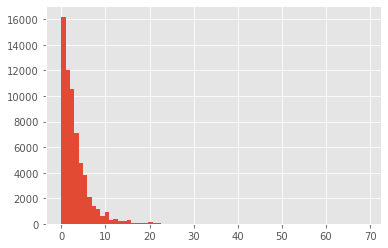

In [78]:
salary_df.yearsatcompany.hist(bins=70)

### Biểu đồ lương trung bình của từng title theo năm (xu hướng ngành nghề mỗi năm)

In [66]:
df = salary_df.copy()
df['year'] = df.timestamp.dt.year
df = df.groupby(['year', 'title'])['totalyearlycompensation'].mean()
df = df.unstack()
df

title,Business Analyst,Data Scientist,Hardware Engineer,Human Resources,Management Consultant,Marketing,Mechanical Engineer,Product Designer,Product Manager,Recruiter,Sales,Software Engineer,Software Engineering Manager,Solution Architect,Technical Program Manager
year,,,,,,,,,,,,,,,
2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,269310.344828,NaN,NaN,238003.623188,303666.666667,NaN,NaN
2018,149000.000000,226503.875969,238000.000000,170000.000000,NaN,100000.000000,NaN,210266.666667,276988.317757,170000.000000,566500.000000,231179.475943,374254.237288,244271.186441,261500.000000
2019,116714.285714,211633.640553,221420.924574,200857.142857,NaN,271428.571429,113875.000000,213052.419355,263759.628154,179000.000000,312555.555556,219399.760336,372315.426997,221489.082969,180000.000000
2020,124845.102506,202522.357724,219348.837209,179453.125000,158977.642276,200464.788732,155619.771863,208917.460317,249851.028349,152938.461538,208838.607595,204269.194631,351456.127080,212060.538117,239265.988372
2021,134720.183486,198522.793404,204625.000000,176951.219512,166675.619835,196268.011527,163461.187215,203468.916519,258598.557692,158741.935484,215231.343284,193447.185453,343458.609272,204312.056738,234952.173913


<AxesSubplot:xlabel='year'>

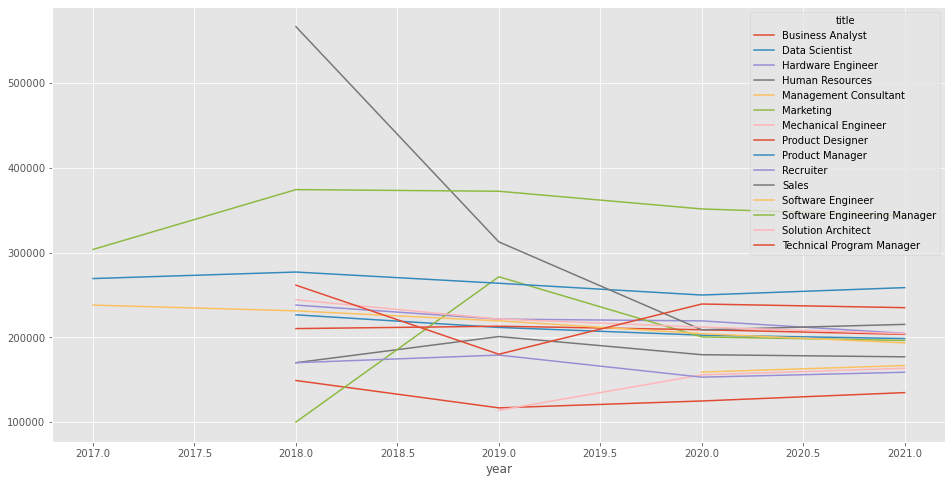

In [67]:
df.plot.line(figsize=(16, 8))

### Bằng PhD có giúp mang lại nhiều thu nhập hơn không? Có phải vị trí nào cũng cần có bằng PhD mới có lương cao?

Yếu tố ảnh hưởng khác: phụ thuộc title, số năm kinh nghiệm

Tiền xử lý: bỏ đi các dòng mà `education` là NaN

In [ ]:
df = salary_df[salary_df['education'].notna()]

Tỉ lệ người có các loại bằng cấp

<AxesSubplot:ylabel='education'>

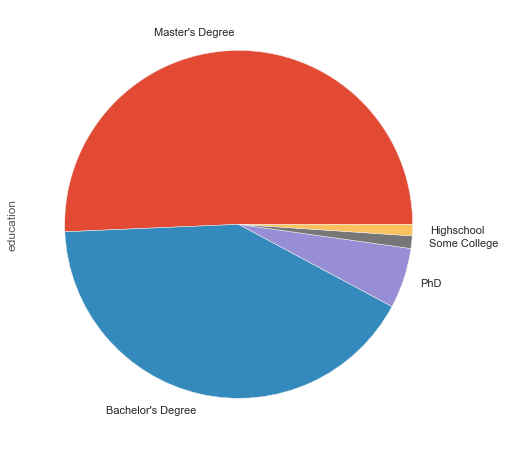

In [134]:
df.education.value_counts().plot.pie(figsize=(10, 8))

Thu nhập trung bình theo bằng cấp

In [130]:
tmp = df[['education', 'totalyearlycompensation']].groupby('education').mean()
tmp = tmp.sort_values('totalyearlycompensation', ascending=False)
tmp

,totalyearlycompensation
education,
PhD,291865.531415
Master's Degree,220731.076603
Some College,210121.126761
Highschool,187731.250000
Bachelor's Degree,177845.409095


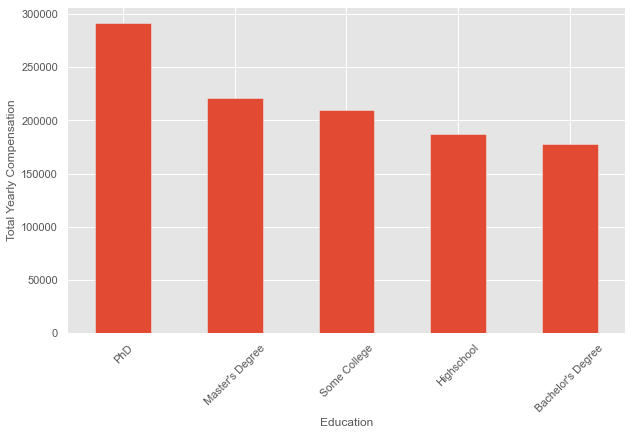

In [131]:
tmp.totalyearlycompensation.plot.bar(figsize=(10, 6))
plt.xticks(rotation=45)
plt.xlabel('Education')
plt.ylabel('Total Yearly Compensation');

Biểu đồ boxplot thể hiện phân bố của thu nhập theo bằng cấp

Text(0, 0.5, 'Total Yearly Compensation')

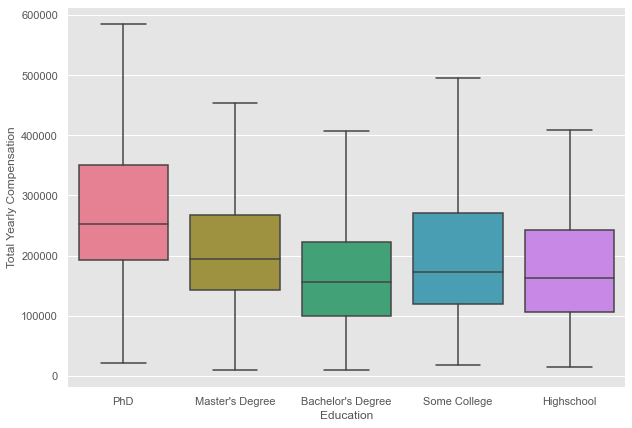

In [132]:
# sns.color_palette("Set2")
plt.figure(figsize=(10, 7))
sns.boxplot(data=df, x='education', y='totalyearlycompensation', showfliers=False, palette=sns.color_palette("husl", 5))
plt.xlabel('Education')
plt.ylabel('Total Yearly Compensation')

**Nhận xét:** Tới đây ta có nhận xét ban đầu là thu nhập trung bình của người có bằng PhD cao hơn so với các bằng cấp còn lại

In [157]:
# tmp = df.groupby('title')[['education']].count()
tmp = df.groupby(['title', 'education']).size()
tmp = tmp.unstack().fillna(0)
tmp

education,Bachelor's Degree,Highschool,Master's Degree,PhD,Some College
title,,,,,
Business Analyst,276.0,0.0,237.0,5.0,3.0
Data Scientist,242.0,4.0,798.0,365.0,1.0
Hardware Engineer,222.0,1.0,840.0,217.0,2.0
Human Resources,89.0,2.0,99.0,7.0,2.0
Management Consultant,252.0,0.0,333.0,12.0,4.0
Marketing,226.0,7.0,182.0,4.0,4.0
Mechanical Engineer,159.0,0.0,130.0,27.0,4.0
Product Designer,386.0,19.0,342.0,20.0,14.0
Product Manager,669.0,13.0,1462.0,35.0,18.0


percentage stack bar

<AxesSubplot:ylabel='title'>

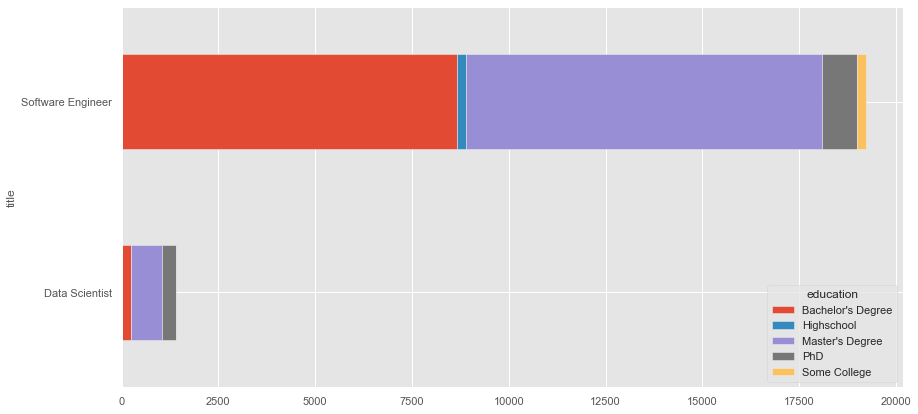

In [167]:
tmp.loc[['Data Scientist', 'Software Engineer'], :].plot(kind='barh', stacked=True, figsize=(14, 7))

In [138]:
tmp = df.groupby('title')[['totalyearlycompensation']].mean().sort_values('totalyearlycompensation', ascending=False)
tmp

,totalyearlycompensation
title,
Software Engineering Manager,340411.533421
Product Manager,249248.065544
Technical Program Manager,232736.591180
Product Designer,209139.564661
Hardware Engineer,206852.574103
Sales,204601.562500
Solution Architect,203735.883424
Data Scientist,199542.553191
Marketing,199082.742317


### Xu hướng nghề nghiệp của nam và nữ

In [6]:
gender_df = salary_df[salary_df.gender.notna()]
print(gender_df[gender_df.gender == 'Male'].shape[0])
print(gender_df[gender_df.gender == 'Female'].shape[0])
male_df = gender_df[gender_df.gender == 'Male']
female_df = gender_df[gender_df.gender == 'Female']

35702
6999


In [7]:
female_title_ratios = female_df['title'].value_counts() / female_df.shape[0]
female_title_ratios

Software Engineer               0.517645
Product Manager                 0.124446
Product Designer                0.073439
Data Scientist                  0.051579
Technical Program Manager       0.036148
Software Engineering Manager    0.031576
Marketing                       0.029004
Business Analyst                0.024146
Recruiter                       0.023289
Hardware Engineer               0.022289
Management Consultant           0.021432
Human Resources                 0.018003
Sales                           0.012287
Solution Architect              0.008858
Mechanical Engineer             0.005858
Name: title, dtype: float64

In [9]:
male_title_ratios = male_df['title'].value_counts() / male_df.shape[0]
male_title_ratios.set_axis(['V', 'W', 'X', 'Y', 'Z'], axis=1, inplace=False)

Software Engineer               0.703070
Product Manager                 0.060697
Software Engineering Manager    0.057616
Data Scientist                  0.038009
Hardware Engineer               0.037981
Solution Architect              0.020587
Technical Program Manager       0.017786
Product Designer                0.017142
Management Consultant           0.013052
Business Analyst                0.009971
Mechanical Engineer             0.007367
Marketing                       0.006050
Sales                           0.005406
Recruiter                       0.003109
Human Resources                 0.002157
Name: title, dtype: float64

In [33]:
df = pd.concat([female_title_ratios, male_title_ratios], axis=1)
df = df.set_axis(['Female', 'Male'], axis=1, inplace=False)
df

,Female,Male
Software Engineer,0.517645,0.703070
Product Manager,0.124446,0.060697
Product Designer,0.073439,0.017142
Data Scientist,0.051579,0.038009
Technical Program Manager,0.036148,0.017786
Software Engineering Manager,0.031576,0.057616
Marketing,0.029004,0.006050
Business Analyst,0.024146,0.009971
Recruiter,0.023289,0.003109
Hardware Engineer,0.022289,0.037981


Text(0, 0.5, 'Ratio')

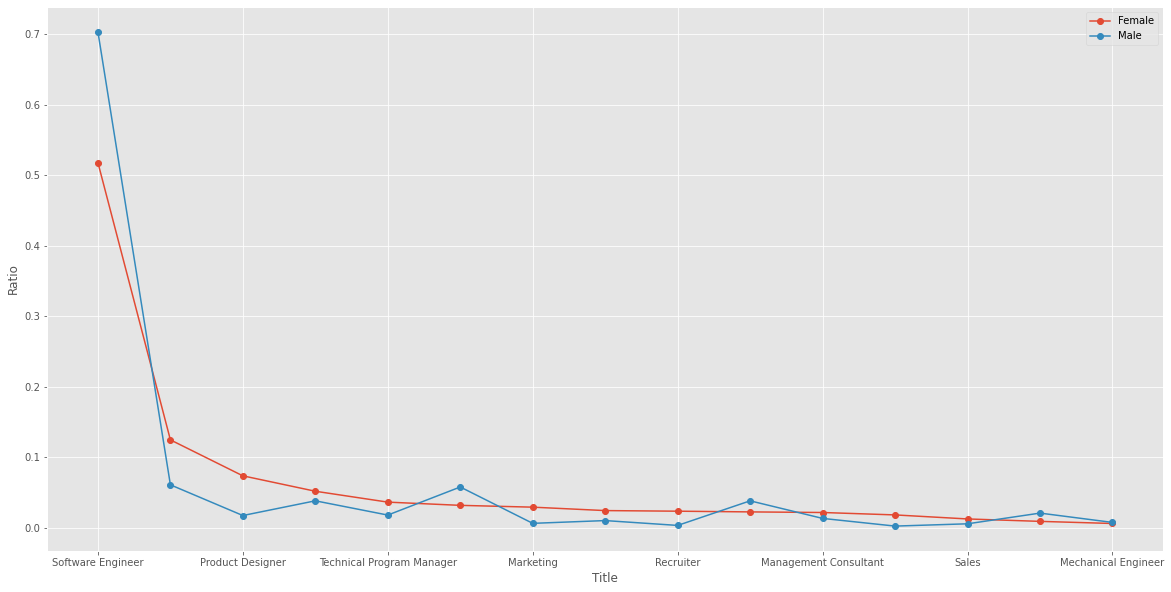

In [34]:
ax = df.plot.line(figsize=(20,10), marker='o')
ax.set_xlabel("Title")
ax.set_ylabel("Ratio")

## 4. Tiền xử lý và phân tích trả lời câu hỏi